In [1]:
import urllib.request
import json
import codecs
import pandas as pd
import seaborn as sns
import matplotlib
%matplotlib inline
matplotlib.rcParams["figure.dpi"] = 240

Total number of buildings with housings according to number of properties. 
Data from the 2011 Census of Buildings.

Read more about the data source [here](http://opendata-ajuntament.barcelona.cat/data/en/dataset/n-edif-hab-segons-n-immo/resource/bb4a365c-d45e-4e0b-be88-2bc5fe485ba6).

In [2]:
def get_open_data_bcn(resource_id):
    "Fetches data from Barcelona's City Hall Open Data Service"
    reader = codecs.getreader("utf-8")
    url = 'http://opendata-ajuntament.barcelona.cat/data/api/action/datastore_search?resource_id=%s' % resource_id
    response = urllib.request.urlopen(url)
    return json.load(reader(response))

In [3]:
resource_id = "a6c01067-63eb-4532-a40a-39d80b7f8bb7"
data = get_open_data_bcn(resource_id)

In [4]:
barrios = pd.DataFrame(data["result"]["records"])
barrios.set_index("Barris", inplace=True)
barrios.drop(["Dte","_id"], axis=1, inplace=True)
sorted_cols = ['UnImmoble', 'DosImmobles', 'TresImmobles','QuatraImmobles', 
               'DeCincANou', 'DeDeuADinou', 'DeVintAVintINou', 'DeTrentaATrentaNou',
                'QuarantaIMes', 'Total']
barrios = barrios[sorted_cols]
new_cols = ["1", "2", "3", "4", "5-9", "10-19", "20-29", "30-39", "40+", "Total"]
barrios.columns = new_cols
barrios = barrios.applymap(lambda cell: cell.replace(".","")).applymap(lambda x: float(x) if x else 0)

### How many properties per building does each Barcelona neighborhood have, in percent?

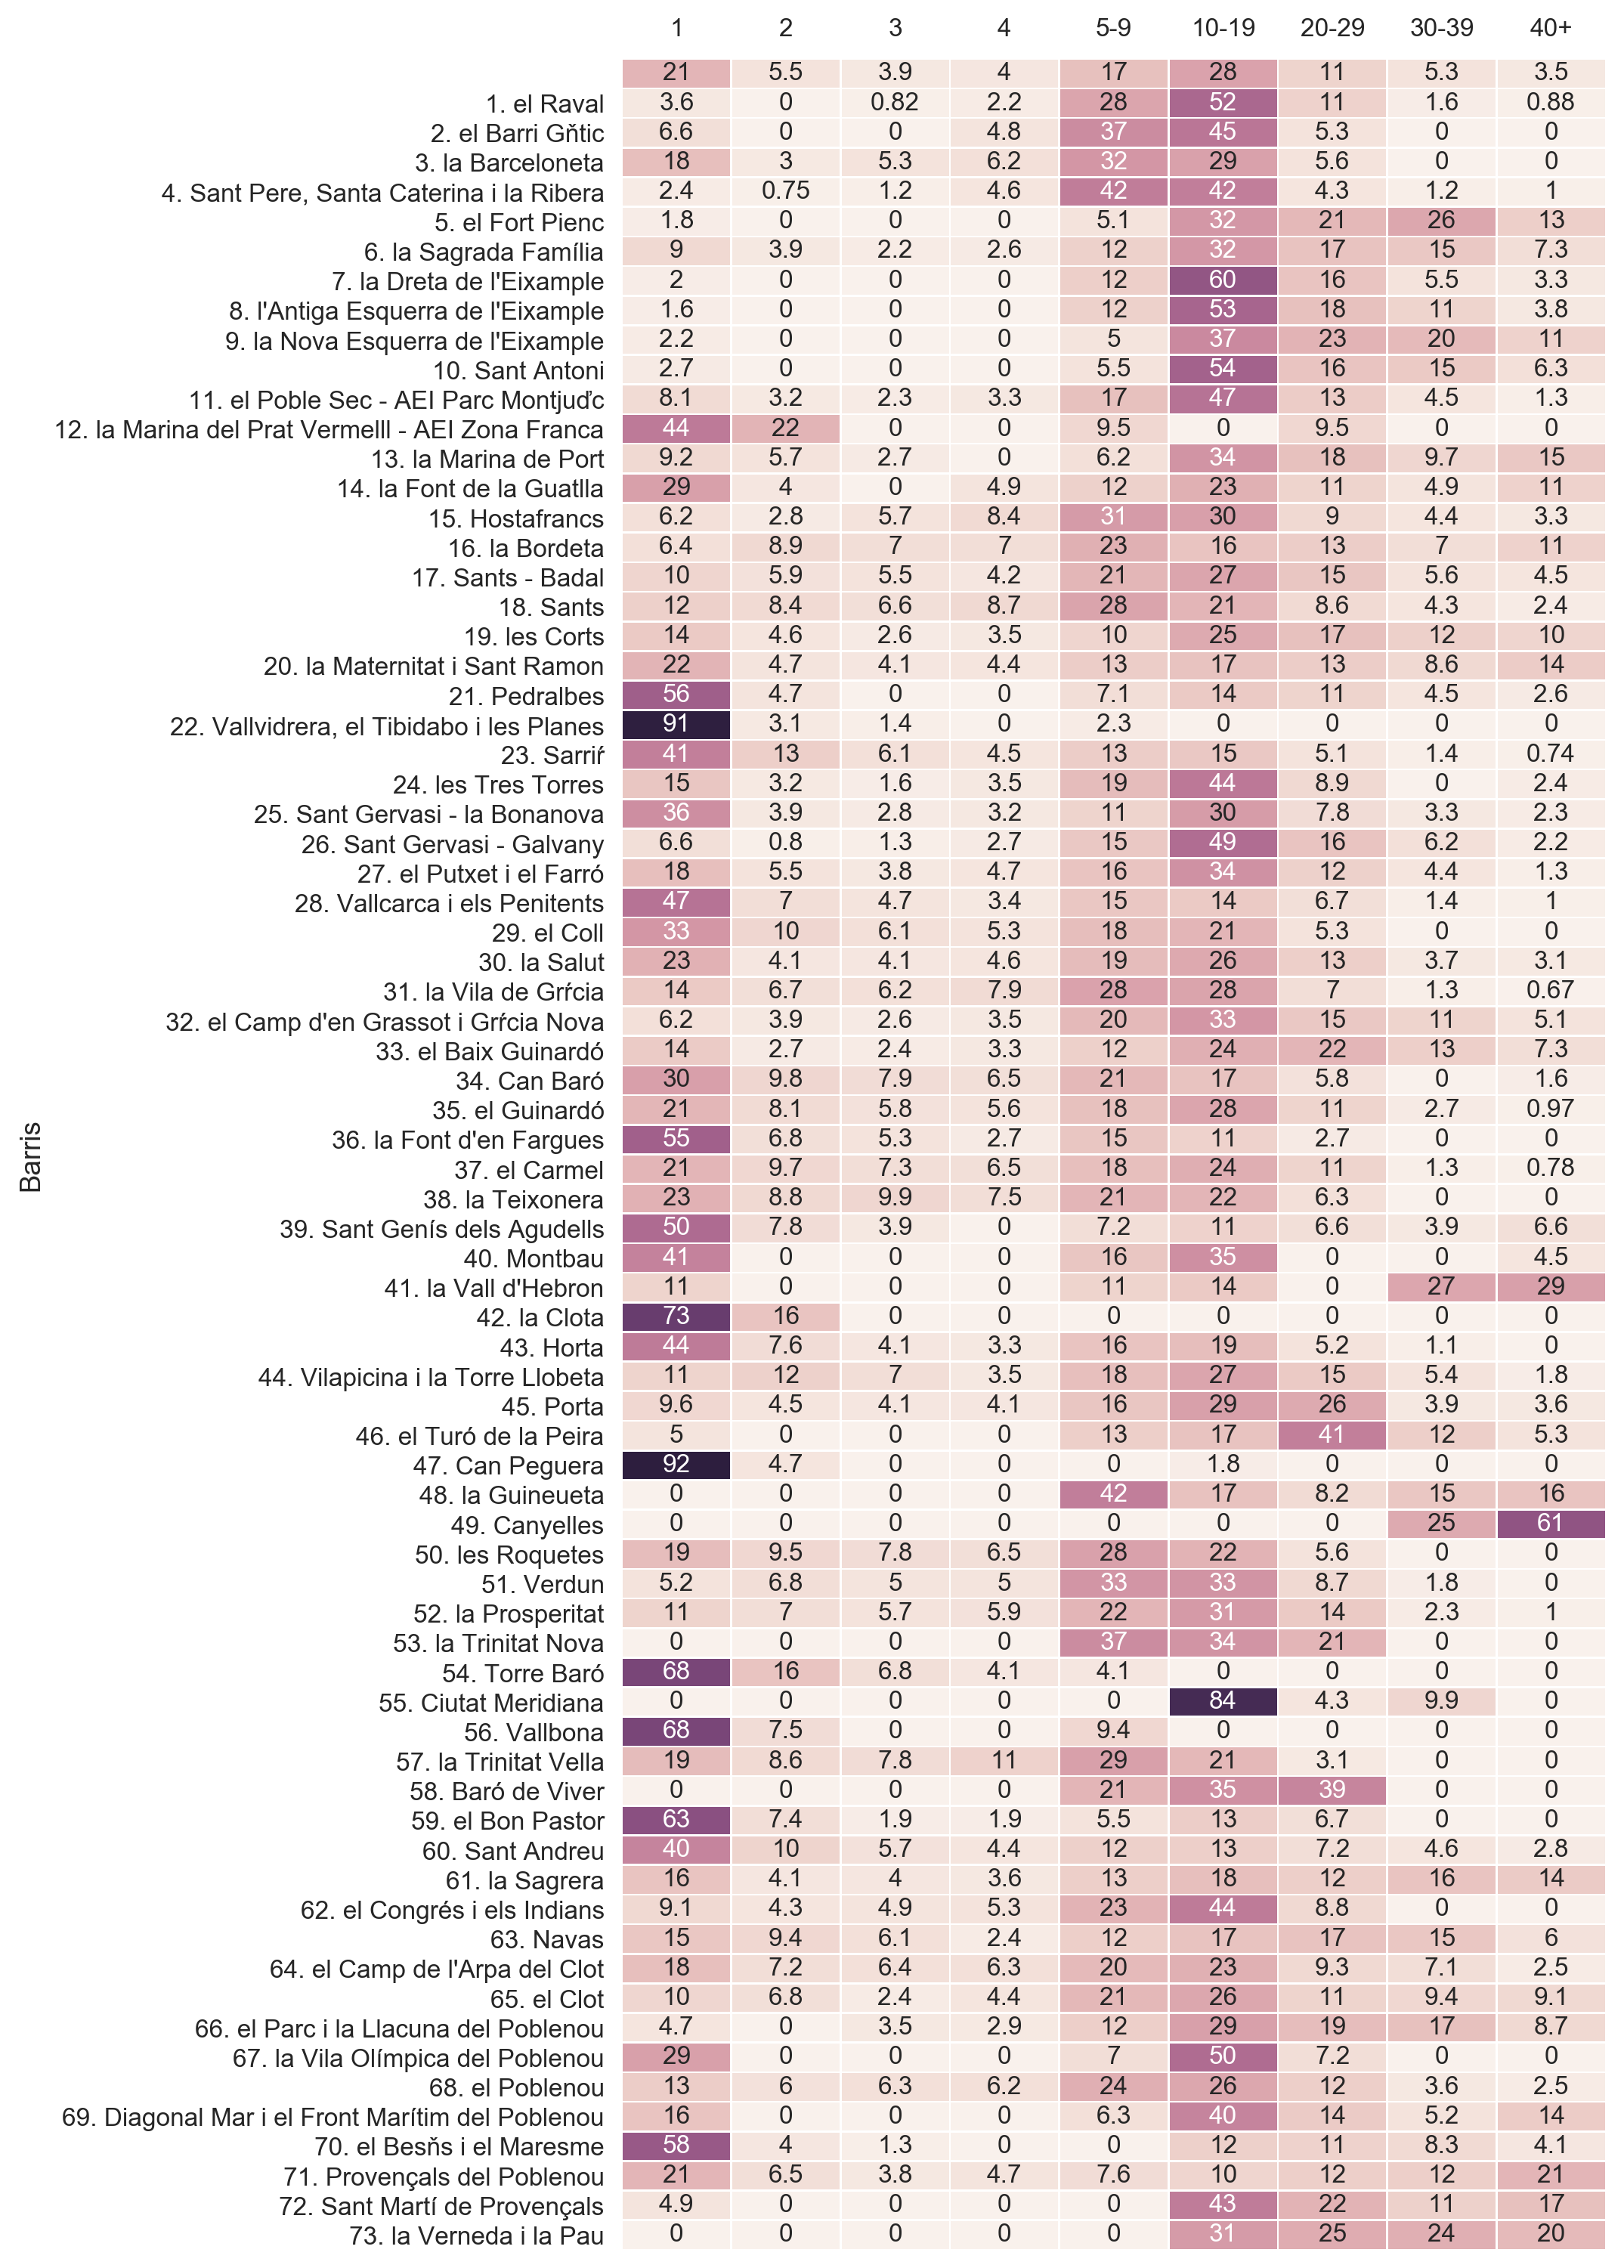

In [27]:
matplotlib.pyplot.figure(figsize=(7,16))
normed = (barrios.drop(["Total"],axis=1).T / barrios["Total"]).T
ax = sns.heatmap(100*normed, annot=True, linewidths=.5, cbar=False)
ax.xaxis.tick_top()

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
barrios_similarity = pd.DataFrame(cosine_similarity(normed), columns=barrios.index, index=barrios.index)

### What are the 10 most similar neighbourhoods to El Poble Sec?

In [7]:
poble_sec_similarity = barrios_similarity["11. el Poble Sec - AEI Parc Montjuďc"].sort_values(ascending=False)
poble_sec_similarity[1:11]

Barris
26. Sant Gervasi - Galvany                0.994949
62. el Congrés i els Indians              0.983492
24. les Tres Torres                       0.981182
1. el Raval                               0.980374
7. la Dreta de l'Eixample                 0.976773
8. l'Antiga Esquerra de l'Eixample        0.971031
32. el Camp d'en Grassot i Grŕcia Nova    0.960925
27. el Putxet i el Farró                  0.958024
52. la Prosperitat                        0.952572
10. Sant Antoni                           0.943742
Name: 11. el Poble Sec - AEI Parc Montjuďc, dtype: float64

### What are the 10 most different neighbourhoods from El Poble Sec?

In [8]:
poble_sec_similarity[-10:].sort_values()

Barris
49. Canyelles                                        0.055368
42. la Clota                                         0.164117
22. Vallvidrera, el Tibidabo i les Planes            0.165611
47. Can Peguera                                      0.175046
54. Torre Baró                                       0.190426
56. Vallbona                                         0.204394
12. la Marina del Prat Vermelll - AEI Zona Franca    0.269394
70. el Besňs i el Maresme                            0.385412
59. el Bon Pastor                                    0.392309
36. la Font d'en Fargues                             0.425223
Name: 11. el Poble Sec - AEI Parc Montjuďc, dtype: float64

### What are the 2 neighbourhoods that are the most different from each other?

In [9]:
md = pd.np.unravel_index(barrios_similarity.values.argmin(), barrios_similarity.shape)
print(barrios_similarity.index[md[0]], "and" ,barrios_similarity.index[md[1]])

2. el Barri Gňtic and 49. Canyelles


Canyelles:


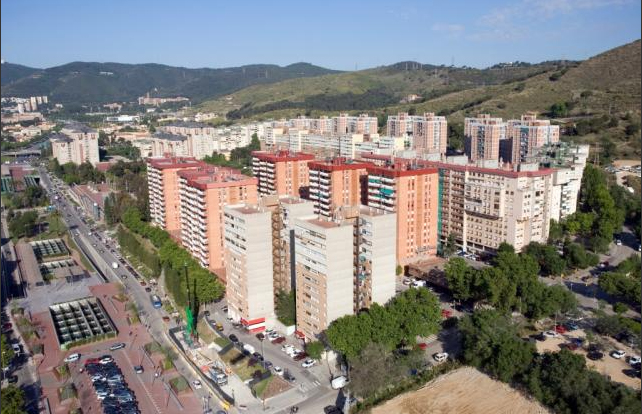

El Gotic:


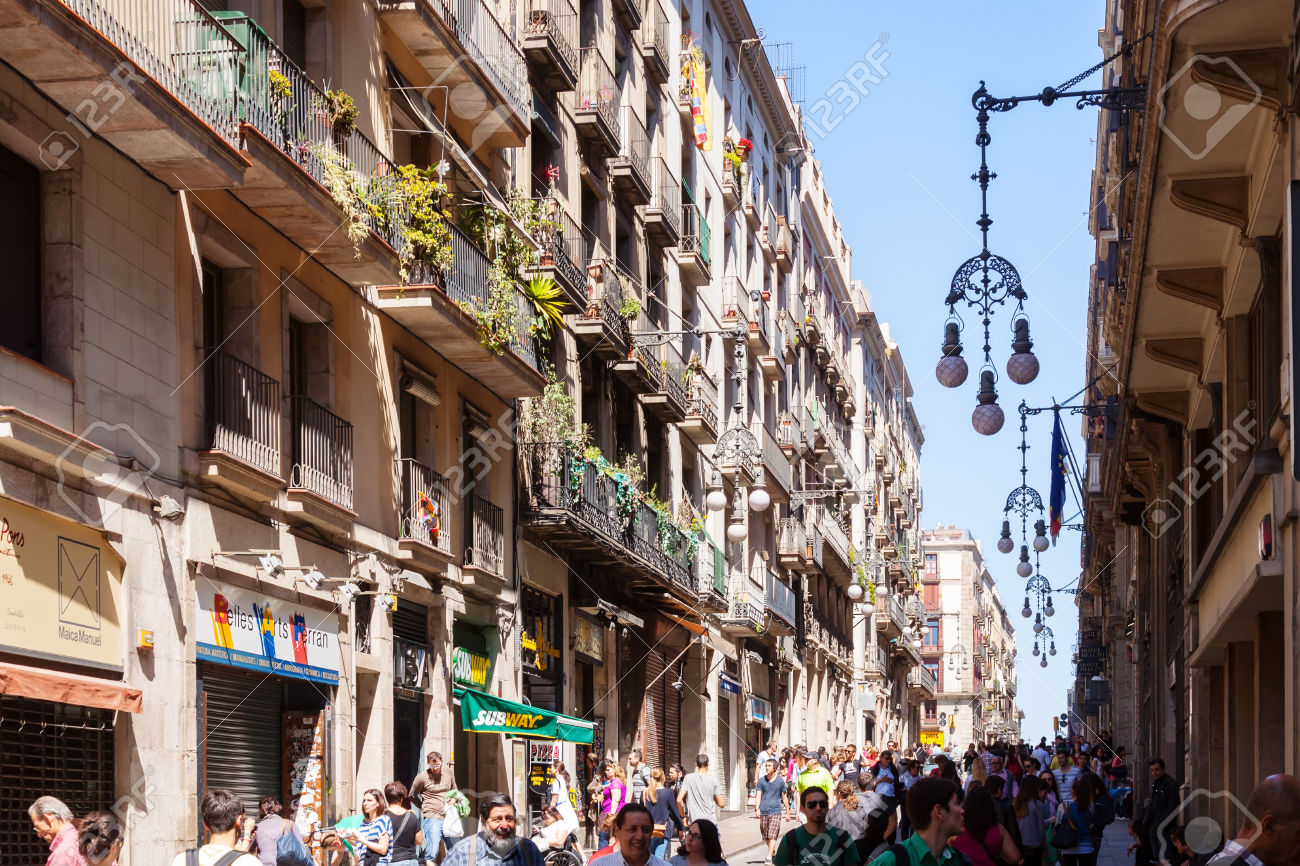

In [22]:
from IPython.display import Image, display
print("Canyelles:")
display(Image("http://www.obrabcn.cat/images/visites/dd10f-canyelles1.jpg", width=400))
print("El Gotic:")
display(Image("https://previews.123rf.com/images/jackf/jackf1312/jackf131200001/24268707-BARCELONA-SPAIN-APRIL-14-Walking-people-at-Barri-Gotic-in-April-14-2013-in-Barcelona-Spain-It-is-cen-Stock-Photo.jpg",width=400))